# Creation of an EPR pair using two qubits


    
Let us write a circuit preparing a Bell state $(|00\rangle + |11\rangle)/\sqrt{2}$, also know as EPR pair.
    
    
First, we need to import relevant objects from the python AQASM module:

In [35]:
from qat.lang.AQASM import Program, H, CNOT 

## Creation of the quantum program

Then, we can declare a new object ``Program``. Let us give it an explicit name:

In [36]:
epr_prog = Program() 

To create our EPR pair, we need to manipulate two qbits. 
Qbits are manipulated through qbit registers only (to keep things structured).
Registers are allocated as follows:

In [37]:
qbits = epr_prog.qalloc(2) 

Now, we can access our qbits using the register "qbits".

Registers behave like python list/arrays.

Here our qbits will be refered to using qbits[0] and qbits[1].

To create our EPR pair, we simply implement the appropriate 2-qbit rotation using a Hadamard gate (H) on the first qbit, followed by a controlled NOT gate (CNOT) on both qbits:

In [38]:
epr_prog.apply(H, qbits[0]) 
epr_prog.apply(CNOT, qbits)

Notice that since the CNOT is applied on both qbits (it is a 2-qbit gate), we can pass the whole register as argument to the ``.apply`` method. In other words, last line of previous cell is equivalent to ``epr_prog.apply(CNOT, qbits[0], qbits[1])``

The corresponding circuit object can be extracted directly from the Program object as follows:

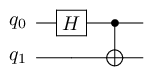

In [39]:
circuit = epr_prog.to_circ()
%qatdisplay circuit

## Simulation of the execution of the circuit
Now that we have a proper circuit, we can try and simulate it:

In [40]:
#Let us import some qpu connected to a classical linear algebra simulator
from qat.qpus import PyLinalg
qpu = PyLinalg()

job = circuit.to_job()

result = qpu.submit(job)
for sample in result:
    print(f"State {sample.state}, with amplitude {sample.amplitude} and probability {sample.probability}")

State |00>, with amplitude (0.7071067811865475+0j) and probability 0.4999999999999999
State |11>, with amplitude (0.7071067811865475+0j) and probability 0.4999999999999999


## Alternative simulation

As an alternative, we can also sample the final state of the system to mimic the measure of the final state of a quantum processor. Here, we expect to see basis state $|00\rangle$ half of the time, and state $|11\rangle$ half of the time (on average).

In [22]:
# Create a job where we specify the number of shots
job = circuit.to_job(nbshots=10, aggregate_data=False)

# Submit to the QPU
result = qpu.submit(job)

# And use it to draw 10 samples
for sample in result:
    print(f"We observed the state {sample.state}")

We observed the state |00>
We observed the state |00>
We observed the state |00>
We observed the state |11>
We observed the state |00>
We observed the state |11>
We observed the state |11>
We observed the state |00>
We observed the state |11>
We observed the state |11>


If we set the `aggregate_data` parameter to `True` (default option) we will have an aggregate view of the sampled states, that will also show the probabilities associated to each one.

In [41]:
# Create a job where we specify the number of shots
job = circuit.to_job(nbshots=10, aggregate_data=True)

# Submit to the QPU
result = qpu.submit(job)

# And use it to draw 10 samples

for sample in result:
    print(f"We measured the state {sample.state} (its probability is {sample.probability} and its amplitude {sample.amplitude})")

We measured the state |11> (its probability is 0.6 and its amplitude None)
We measured the state |00> (its probability is 0.4 and its amplitude None)


Of course, increasing the number of shots will produce a probability distribution closer to the one we would expect.

In [42]:
# Create a job where we specify the number of shots
job = circuit.to_job(nbshots=10000, aggregate_data=True)

# Submit to the QPU
result = qpu.submit(job)

# And use it to draw 10 samples

for sample in result:
    print(f"We measured the state {sample.state} (its probability is {sample.probability} and its amplitude {sample.amplitude})")

We measured the state |00> (its probability is 0.4964 and its amplitude None)
We measured the state |11> (its probability is 0.5036 and its amplitude None)


## Export to Atos Quantum Assembly Language (AQASM) format
We can also export our circuit in the AQASM format:

In [28]:
epr_prog.export("helloworld.aqasm") 

The generated file *helloworld.aqasm* should look like this:

In [16]:
!cat helloworld.aqasm

BEGIN
qubits 2
cbits 2

H  q[0]
CNOT  q[0],q[1]
END


and can be compiled to circ format as follows:

In [43]:
!aqasm2circ helloworld.aqasm

In [44]:
!ls -l helloworld.aqasm.circ

-rw-r--r-- 1 simone simone 7254 Mar 24 11:26 helloworld.aqasm.circ
